# Algerian Fire predication


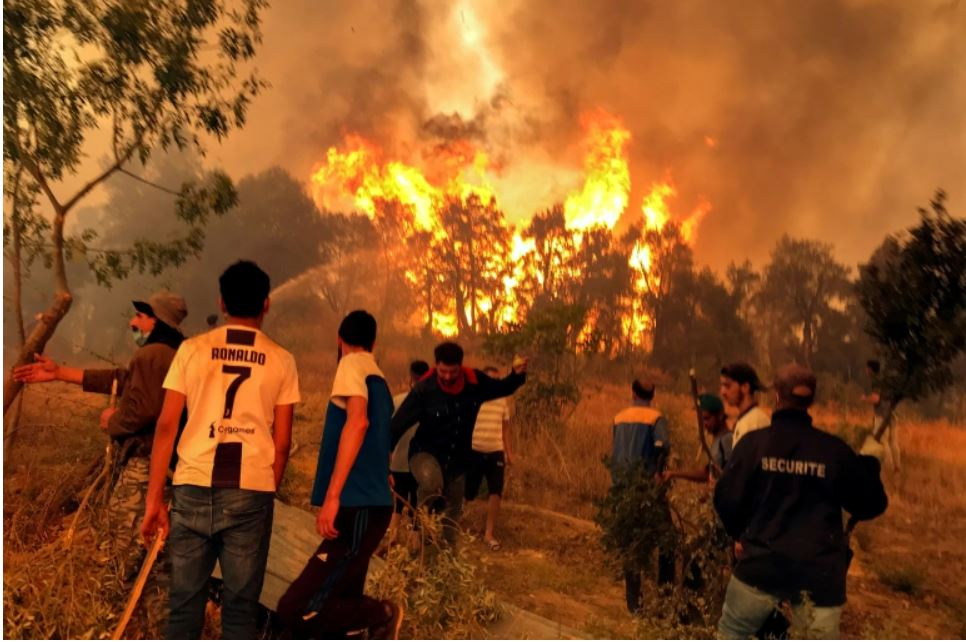# 

 # column Description
 1. Date : (DD/MM/YYYY) Day, month ('june' to 'september'), year (2012)
Weather data observations
2. Temp : temperature noon (temperature max) in Celsius degrees: 22 to 42
3. RH : Relative Humidity in %: 21 to 90
4. Ws :Wind speed in km/h: 6 to 29
5. Rain: total day in mm: 0 to 16.8
FWI Components
6. Fine Fuel Moisture Code (FFMC) index from the FWI system: 28.6 to 92.5
7. Duff Moisture Code (DMC) index from the FWI system: 1.1 to 65.9
8. Drought Code (DC) index from the FWI system: 7 to 220.4
9. Initial Spread Index (ISI) index from the FWI system: 0 to 18.5
10. Buildup Index (BUI) index from the FWI system: 1.1 to 68
11. Fire Weather Index (FWI) Index: 0 to 31.1
12. Classes: two classes, namely Fire and ând not Fire

# Life cycle of Machine learning Model

1. Data Gathering 
2. Feature Engineering
3. Feature Scaling
4. Model Selection
5. Model Deployment

# What is Logistic Regression

#### Logistic Regression
is a Machine Learning method that is used to solve classification issues. It is a predictive analytic technique that is based on the probability idea. The classification algorithm Logistic Regression is used to predict the likelihood of a categorical dependent variable. The dependant variable in logistic regression is a binary variable with data coded as 1 (yes, True, normal, success, etc.) or 0 (no, False, abnormal, failure, etc.).

# Advantage of Logistic Regression

## The advantages of the logistic regression are as follows:

1. Logistic Regression is very easy to understand.

2. It requires less training.

3. It performs well for simple datasets as well as when the data set is linearly separable.

4. It doesn’t make any assumptions about the distributions of classes in feature space.

5. A Logistic Regression model is less likely to be over-fitted but it can overfit in high dimensional datasets. To avoid over-fitting these scenarios, One may consider regularization.

## Disadvantage of Linear Regression

The disadvantages of the logistic regression are as follows:

1. Sometimes a lot of Feature Engineering is required.

2. If the independent features are correlated with each other it may affect the performance of the classifier.

3. It is quite sensitive to noise and overfitting.

4. Logistic Regression should not be used if the number of observations is lesser than the number of features, otherwise, it may lead to overfitting.

5. By using Logistic Regression, non-linear problems can’t be solved because it has a linear decision surface. But in real-world scenarios, the linearly separable data is rarely found

In [1]:
 import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Reading the file

In [2]:
df=pd.read_csv(r"c:\users\lenovo\downloads\Algerian_forest_fires_dataset_UPDATE.csv",header=1)

In [3]:
df.head() #reading the first five value

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
0,01,06,2012,29,57,18,0,65.7,3.4,7.6,1.3,3.4,0.5,not fire
1,02,06,2012,29,61,13,1.3,64.4,4.1,7.6,1,3.9,0.4,not fire
2,03,06,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire
3,04,06,2012,25,89,13,2.5,28.6,1.3,6.9,0,1.7,0,not fire
4,05,06,2012,27,77,16,0,64.8,3,14.2,1.2,3.9,0.5,not fire


In [4]:
df.loc[0:122,"Region"]="Bejaia"    #the dataset is divided into two region bejajia and SidiBelAbbes
df.loc[122:,"Region"]="SidiBelAbbes"

In [5]:
df.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,01,06,2012,29,57,18,0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,Bejaia
1,02,06,2012,29,61,13,1.3,64.4,4.1,7.6,1,3.9,0.4,not fire,Bejaia
2,03,06,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,Bejaia
3,04,06,2012,25,89,13,2.5,28.6,1.3,6.9,0,1.7,0,not fire,Bejaia
4,05,06,2012,27,77,16,0,64.8,3,14.2,1.2,3.9,0.5,not fire,Bejaia


In [6]:
df.isnull().sum() #column wise null value

day            0
month          1
year           1
Temperature    1
 RH            1
 Ws            1
Rain           1
FFMC           1
DMC            1
DC             1
ISI            1
BUI            1
FWI            1
Classes        2
Region         0
dtype: int64

In [7]:
df.shape

(246, 15)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 246 entries, 0 to 245
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   day          246 non-null    object
 1   month        245 non-null    object
 2   year         245 non-null    object
 3   Temperature  245 non-null    object
 4    RH          245 non-null    object
 5    Ws          245 non-null    object
 6   Rain         245 non-null    object
 7   FFMC         245 non-null    object
 8   DMC          245 non-null    object
 9   DC           245 non-null    object
 10  ISI          245 non-null    object
 11  BUI          245 non-null    object
 12  FWI          245 non-null    object
 13  Classes      244 non-null    object
 14  Region       246 non-null    object
dtypes: object(15)
memory usage: 29.0+ KB


In [9]:
df.memory_usage()#checking memory usage

Index           128
day            1968
month          1968
year           1968
Temperature    1968
 RH            1968
 Ws            1968
Rain           1968
FFMC           1968
DMC            1968
DC             1968
ISI            1968
BUI            1968
FWI            1968
Classes        1968
Region         1968
dtype: int64

In [10]:
df[df.isna().any(axis=1)] #checking for na value

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
122,Sidi-Bel Abbes Region Dataset,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,SidiBelAbbes
167,14,07,2012,37,37,18,0.2,88.9,12.9,14.6 9,12.5,10.4,fire,NaN,SidiBelAbbes


In [11]:
df.drop(index=[122,123], inplace=True) 
df.reset_index(inplace=True)
df.drop('index', axis=1, inplace=True)

In [12]:
df.iloc[121:]

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
121,30,09,2012,25,78,14,1.4,45,1.9,7.5,0.2,2.4,0.1,not fire,Bejaia
122,01,06,2012,32,71,12,0.7,57.1,2.5,8.2,0.6,2.8,0.2,not fire,SidiBelAbbes
123,02,06,2012,30,73,13,4,55.7,2.7,7.8,0.6,2.9,0.2,not fire,SidiBelAbbes
124,03,06,2012,29,80,14,2,48.7,2.2,7.6,0.3,2.6,0.1,not fire,SidiBelAbbes
125,04,06,2012,30,64,14,0,79.4,5.2,15.4,2.2,5.6,1,not fire,SidiBelAbbes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
239,26,09,2012,30,65,14,0,85.4,16,44.5,4.5,16.9,6.5,fire,SidiBelAbbes
240,27,09,2012,28,87,15,4.4,41.1,6.5,8,0.1,6.2,0,not fire,SidiBelAbbes
241,28,09,2012,27,87,29,0.5,45.9,3.5,7.9,0.4,3.4,0.2,not fire,SidiBelAbbes
242,29,09,2012,24,54,18,0.1,79.7,4.3,15.2,1.7,5.1,0.7,not fire,SidiBelAbbes


In [13]:
#now checking null value after row removal 
df.isna().sum()

day            0
month          0
year           0
Temperature    0
 RH            0
 Ws            0
Rain           0
FFMC           0
DMC            0
DC             0
ISI            0
BUI            0
FWI            0
Classes        1
Region         0
dtype: int64

In [14]:
#stripping the column name
df.columns = [i.strip() for i in df.columns]
df.columns

Index(['day', 'month', 'year', 'Temperature', 'RH', 'Ws', 'Rain', 'FFMC',
       'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes', 'Region'],
      dtype='object')

In [15]:
#stripping classes
df.Classes = df.Classes.str.strip()
df['Classes'].unique()

array(['not fire', 'fire', nan], dtype=object)

In [16]:
#only classes has one na left we will replace it with mode
df['Classes'].fillna(df['Classes'].mode()[0], inplace=True)

In [17]:
df.isnull().sum()

day            0
month          0
year           0
Temperature    0
RH             0
Ws             0
Rain           0
FFMC           0
DMC            0
DC             0
ISI            0
BUI            0
FWI            0
Classes        0
Region         0
dtype: int64

In [18]:
df['Classes'].unique()

array(['not fire', 'fire'], dtype=object)

In [19]:
# Checking for unique value in FWI
df["FWI"].unique()

array(['0.5', '0.4', '0.1', '0', '2.5', '7.2', '7.1', '0.3', '0.9', '5.6',
       '7.1 ', '0.2', '1.4', '2.2', '2.3', '3.8', '7.5', '8.4', '10.6',
       '15', '13.9', '3.9', '12.9', '1.7', '4.9', '6.8', '3.2', '8',
       '0.6', '3.4', '0.8', '3.6', '6', '10.9', '4', '8.8', '2.8', '2.1',
       '1.3', '7.3', '15.3', '11.3', '11.9', '10.7', '15.7', '6.1', '2.6',
       '9.9', '11.6', '12.1', '4.2', '10.2', '6.3', '14.6', '16.1',
       '17.2', '16.8', '18.4', '20.4', '22.3', '20.9', '20.3', '13.7',
       '13.2', '19.9', '30.2', '5.9', '7.7', '9.7', '8.3', '0.7', '4.1',
       '1', '3.1', '1.9', '10', '16.7', '1.2', '5.3', '6.7', '9.5', '12',
       '6.4', '5.2', '3', '9.6', '4.7', 'fire   ', '14.1', '9.1', '13',
       '17.3', '30', '25.4', '16.3', '9', '14.5', '13.5', '19.5', '12.6',
       '12.7', '21.6', '18.8', '10.5', '5.5', '14.8', '24', '26.3',
       '12.2', '18.1', '24.5', '26.9', '31.1', '30.3', '26.1', '16',
       '19.4', '2.7', '3.7', '10.3', '5.7', '9.8', '19.3', '17.5',

In [20]:
df["FWI"].mode()

0    0.4
dtype: object

In [21]:
#FWI contains only categorical value we will replace with mode
df.loc[df["FWI"] == 'fire   ', "FWI"] = 0.4


In [22]:
# Checking for unique value in FWI
df["FWI"].unique()

array(['0.5', '0.4', '0.1', '0', '2.5', '7.2', '7.1', '0.3', '0.9', '5.6',
       '7.1 ', '0.2', '1.4', '2.2', '2.3', '3.8', '7.5', '8.4', '10.6',
       '15', '13.9', '3.9', '12.9', '1.7', '4.9', '6.8', '3.2', '8',
       '0.6', '3.4', '0.8', '3.6', '6', '10.9', '4', '8.8', '2.8', '2.1',
       '1.3', '7.3', '15.3', '11.3', '11.9', '10.7', '15.7', '6.1', '2.6',
       '9.9', '11.6', '12.1', '4.2', '10.2', '6.3', '14.6', '16.1',
       '17.2', '16.8', '18.4', '20.4', '22.3', '20.9', '20.3', '13.7',
       '13.2', '19.9', '30.2', '5.9', '7.7', '9.7', '8.3', '0.7', '4.1',
       '1', '3.1', '1.9', '10', '16.7', '1.2', '5.3', '6.7', '9.5', '12',
       '6.4', '5.2', '3', '9.6', '4.7', 0.4, '14.1', '9.1', '13', '17.3',
       '30', '25.4', '16.3', '9', '14.5', '13.5', '19.5', '12.6', '12.7',
       '21.6', '18.8', '10.5', '5.5', '14.8', '24', '26.3', '12.2',
       '18.1', '24.5', '26.9', '31.1', '30.3', '26.1', '16', '19.4',
       '2.7', '3.7', '10.3', '5.7', '9.8', '19.3', '17.5', '15.4

In [23]:
df[df["FWI"] == "fire"].index

Int64Index([], dtype='int64')

In [24]:
# we will replace String variable with mode
df.loc[df["DC"] == '14.6 9', "DC"] = df["DC"].mode()

In [25]:
# Changing The DataTypes of the Columns

df['day']=df['day'].astype(int)
df['month']=df['month'].astype(int)
df['year']=df['year'].astype(int)
df['Temperature']=df['Temperature'].astype(int)
df['RH']=df['RH'].astype(int)
df['Ws']=df['Ws'].astype(float)
df['Rain']=df['Rain'].astype(float)
df['FFMC']=df['FFMC'].astype(float)
df['DMC']=df['DMC'].astype(float)
df['ISI']=df['ISI'].astype(float)
df['BUI']=df['BUI'].astype(float)
df['FWI']=df['FWI'].astype(float)
df['DC']=df['DC'].astype(float)

In [26]:
#dropping year as it same for every row
df.drop("year",axis=1,inplace=True)

In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   day          244 non-null    int32  
 1   month        244 non-null    int32  
 2   Temperature  244 non-null    int32  
 3   RH           244 non-null    int32  
 4   Ws           244 non-null    float64
 5   Rain         244 non-null    float64
 6   FFMC         244 non-null    float64
 7   DMC          244 non-null    float64
 8   DC           243 non-null    float64
 9   ISI          244 non-null    float64
 10  BUI          244 non-null    float64
 11  FWI          244 non-null    float64
 12  Classes      244 non-null    object 
 13  Region       244 non-null    object 
dtypes: float64(8), int32(4), object(2)
memory usage: 23.0+ KB


# EDA

## 1. Statistical Analysis

In [28]:
df.describe()

,day,month,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI
count,244.000000,244.000000,244.000000,244.000000,244.000000,244.000000,244.000000,244.000000,243.000000,244.000000,244.000000,244.000000
mean,15.754098,7.500000,32.172131,61.938525,15.504098,0.760656,77.887705,14.673361,49.430864,4.774180,16.664754,7.008197
std,8.825059,1.112961,3.633843,14.884200,2.810178,1.999406,14.337571,12.368039,47.665606,4.175318,14.204824,7.437383
min,1.000000,6.000000,22.000000,21.000000,6.000000,0.000000,28.600000,0.700000,6.900000,0.000000,1.100000,0.000000
25%,8.000000,7.000000,30.000000,52.000000,14.000000,0.000000,72.075000,5.800000,12.350000,1.400000,6.000000,0.700000
50%,16.000000,7.500000,32.000000,63.000000,15.000000,0.000000,83.500000,11.300000,33.100000,3.500000,12.250000,4.200000
75%,23.000000,8.000000,35.000000,73.250000,17.000000,0.500000,88.300000,20.750000,69.100000,7.300000,22.525000,11.375000
max,31.000000,9.000000,42.000000,90.000000,29.000000,16.800000,96.000000,65.900000,220.400000,19.000000,68.000000,31.100000


In [29]:
df.corr()

,day,month,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI
day,1.000000e+00,2.232788e-17,0.095772,-0.074209,0.047001,-0.112265,0.224032,0.491571,0.527952,0.177727,0.517229,0.350909
month,2.232788e-17,1.000000e+00,-0.059017,-0.037884,-0.041447,0.035322,0.015577,0.068178,0.126511,0.061680,0.085822,0.084119
Temperature,9.577222e-02,-5.901677e-02,1.000000,-0.654443,-0.278132,-0.326786,0.677491,0.483105,0.376284,0.607551,0.455504,0.558800
RH,-7.420934e-02,-3.788419e-02,-0.654443,1.000000,0.236084,0.222968,-0.645658,-0.405133,-0.226941,-0.690637,-0.348587,-0.570483
Ws,4.700086e-02,-4.144673e-02,-0.278132,0.236084,1.000000,0.170169,-0.163255,-0.001246,0.079135,0.015248,0.029756,0.029001
Rain,-1.122654e-01,3.532207e-02,-0.326786,0.222968,0.170169,1.000000,-0.544045,-0.288548,-0.298023,-0.347105,-0.299171,-0.322810
FFMC,2.240321e-01,1.557668e-02,0.677491,-0.645658,-0.163255,-0.544045,1.000000,0.602391,0.507397,0.739730,0.589652,0.686342
DMC,4.915710e-01,6.817778e-02,0.483105,-0.405133,-0.001246,-0.288548,0.602391,1.000000,0.875925,0.674499,0.982073,0.874924
DC,5.279524e-01,1.265111e-01,0.376284,-0.226941,0.079135,-0.298023,0.507397,0.875925,1.000000,0.508643,0.941988,0.739521
ISI,1.777266e-01,6.168011e-02,0.607551,-0.690637,0.015248,-0.347105,0.739730,0.674499,0.508643,1.000000,0.635891,0.908054


In [30]:
df.skew()

C:\Users\Lenovo\AppData\Local\Temp/ipykernel_17208/1665899112.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df.skew()


day            0.002806
month          0.000000
Temperature   -0.196309
RH            -0.237964
Ws             0.545881
Rain           4.579071
FFMC          -1.325633
DMC            1.527652
DC             1.473460
ISI            1.121975
BUI            1.459069
FWI            1.152413
dtype: float64

## Observation:
1. FFMC is left skewed
2. DMC ,ISI ,BUI are right skewed
3. Rain is right skewed has very high postive skewness may contain outliers

## Separating Categorical and Numerical Feature

In [31]:
num_col=[fe for fe in df.columns if df[fe].dtype!="O"] #finding the numerical column

In [32]:
num_col

['day',
 'month',
 'Temperature',
 'RH',
 'Ws',
 'Rain',
 'FFMC',
 'DMC',
 'DC',
 'ISI',
 'BUI',
 'FWI']

In [33]:
print(f"we have {len(num_col)} numerical feature")

we have 12 numerical feature


In [34]:
cat_col=[fe for fe in df.columns if df[fe].dtype=="O"] # finding the categorical column
cat_col

['Classes', 'Region']

In [35]:
print(f"we have {len(cat_col)} categorical feature")

we have 2 categorical feature


# Graphical Analysis

## 1.Univariate Analysis

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-lev

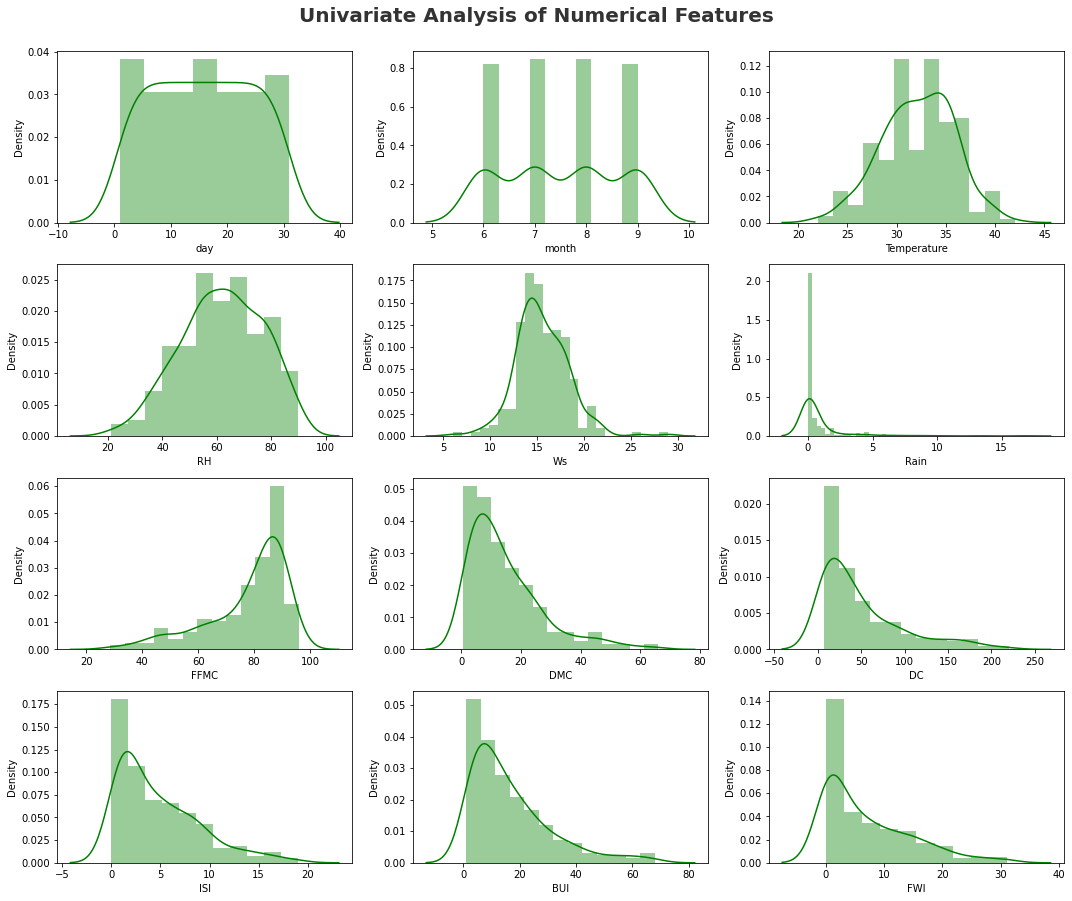

In [36]:
#distplot to check skewness
plt.figure(figsize=(15, 15))
plt.suptitle('Univariate Analysis of Numerical Features', fontsize=20, fontweight='bold', alpha=0.8, y=1.)
for i in range(0,len(num_col)):
    plt.subplot(5, 3, i+1)
    sns.distplot(df[num_col[i]], color='g')
    plt.xlabel(num_col[i])
    plt.tight_layout()

<AxesSubplot:>

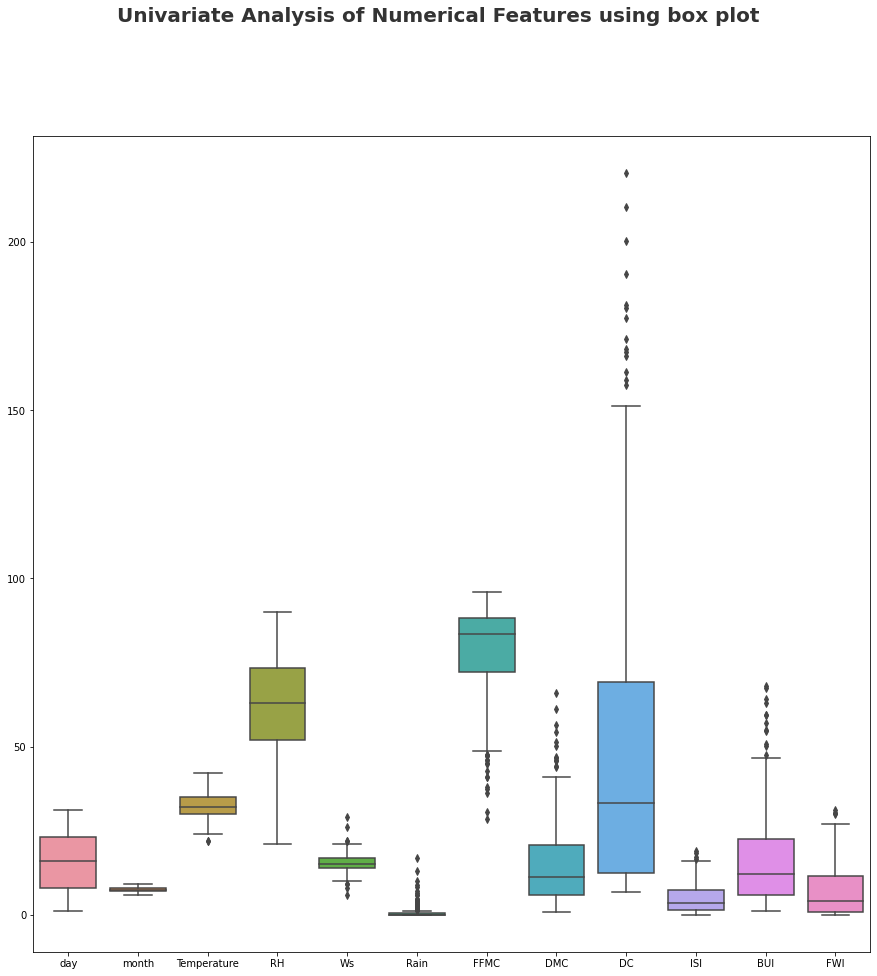

In [37]:
## Boxplot to find Outliers in the features
plt.figure(figsize=(15, 15))
plt.suptitle('Univariate Analysis of Numerical Features using box plot', fontsize=20, fontweight='bold', alpha=0.8, y=1.)
sns.boxplot(data = df,orient="v")

# bivariate Analysis

<AxesSubplot:xlabel='Rain', ylabel='Temperature'>

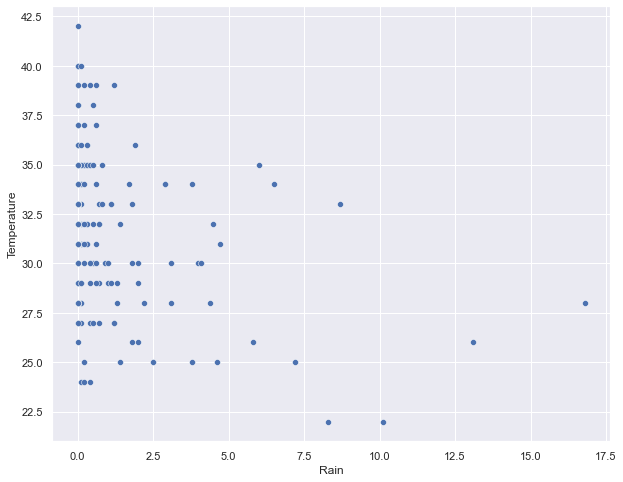

In [38]:
sns.set(rc = {'figure.figsize' : (10,8)})
sns.scatterplot(x=df["Rain"],y=df["Temperature"])

<AxesSubplot:xlabel='Ws', ylabel='Temperature'>

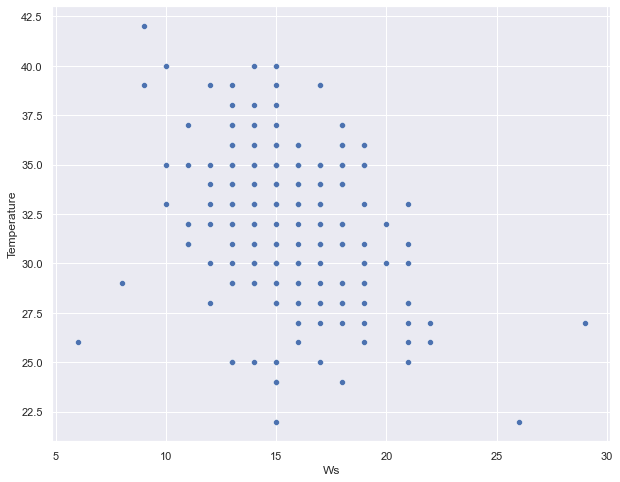

In [39]:
sns.set(rc = {'figure.figsize' : (10,8)})
sns.scatterplot(x=df["Ws"],y=df["Temperature"])

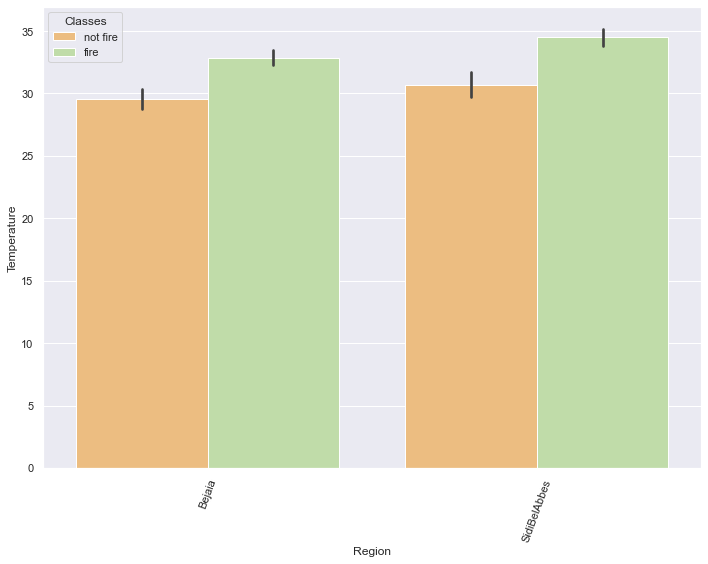

In [40]:
sns.set(rc = {'figure.figsize' : (10,8)})
sns.barplot(y="Temperature",x="Region",palette = "Spectral",hue="Classes",data=df,)
plt.xticks(rotation=70)
plt.tight_layout()

### observation
1 .SidiBelAbbes has higher temperature

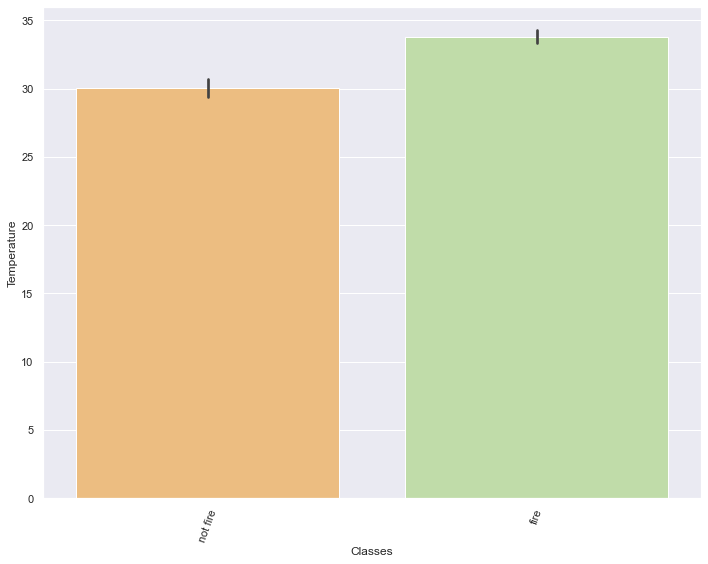

In [41]:
sns.set(rc = {'figure.figsize' : (10,8)})
sns.barplot(x="Classes",y="Temperature",palette = "Spectral",data=df,)
plt.xticks(rotation=70)
plt.tight_layout()

<AxesSubplot:xlabel='Ws', ylabel='Temperature'>

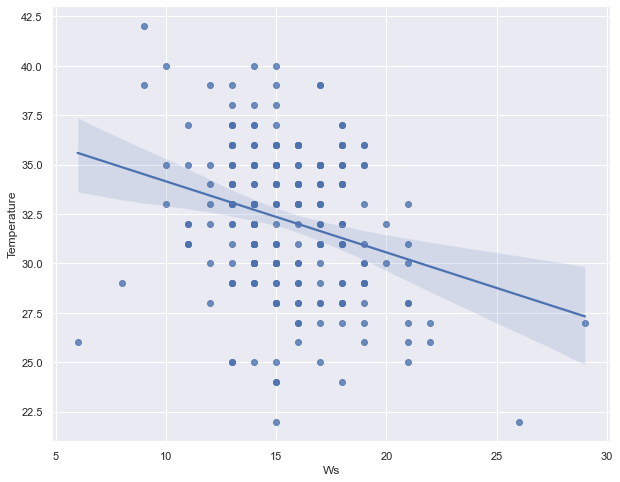

In [42]:
sns.regplot(x="Ws",y="Temperature",data=df)

<AxesSubplot:xlabel='ISI', ylabel='Temperature'>

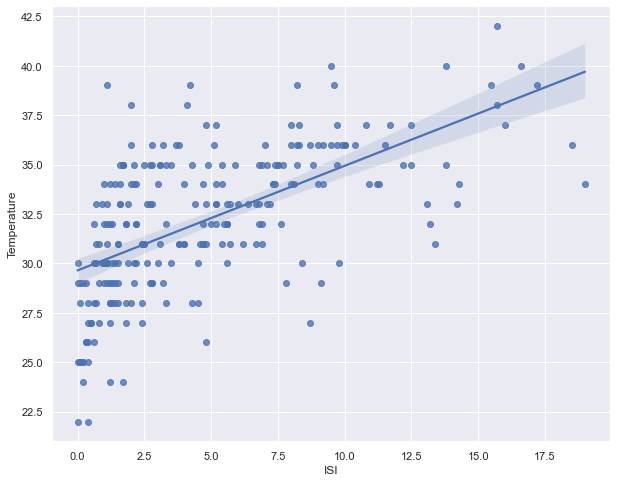

In [43]:
sns.regplot(x="ISI",y="Temperature",data=df)

## Multivariate Analysis

<Figure size 1080x1080 with 0 Axes>

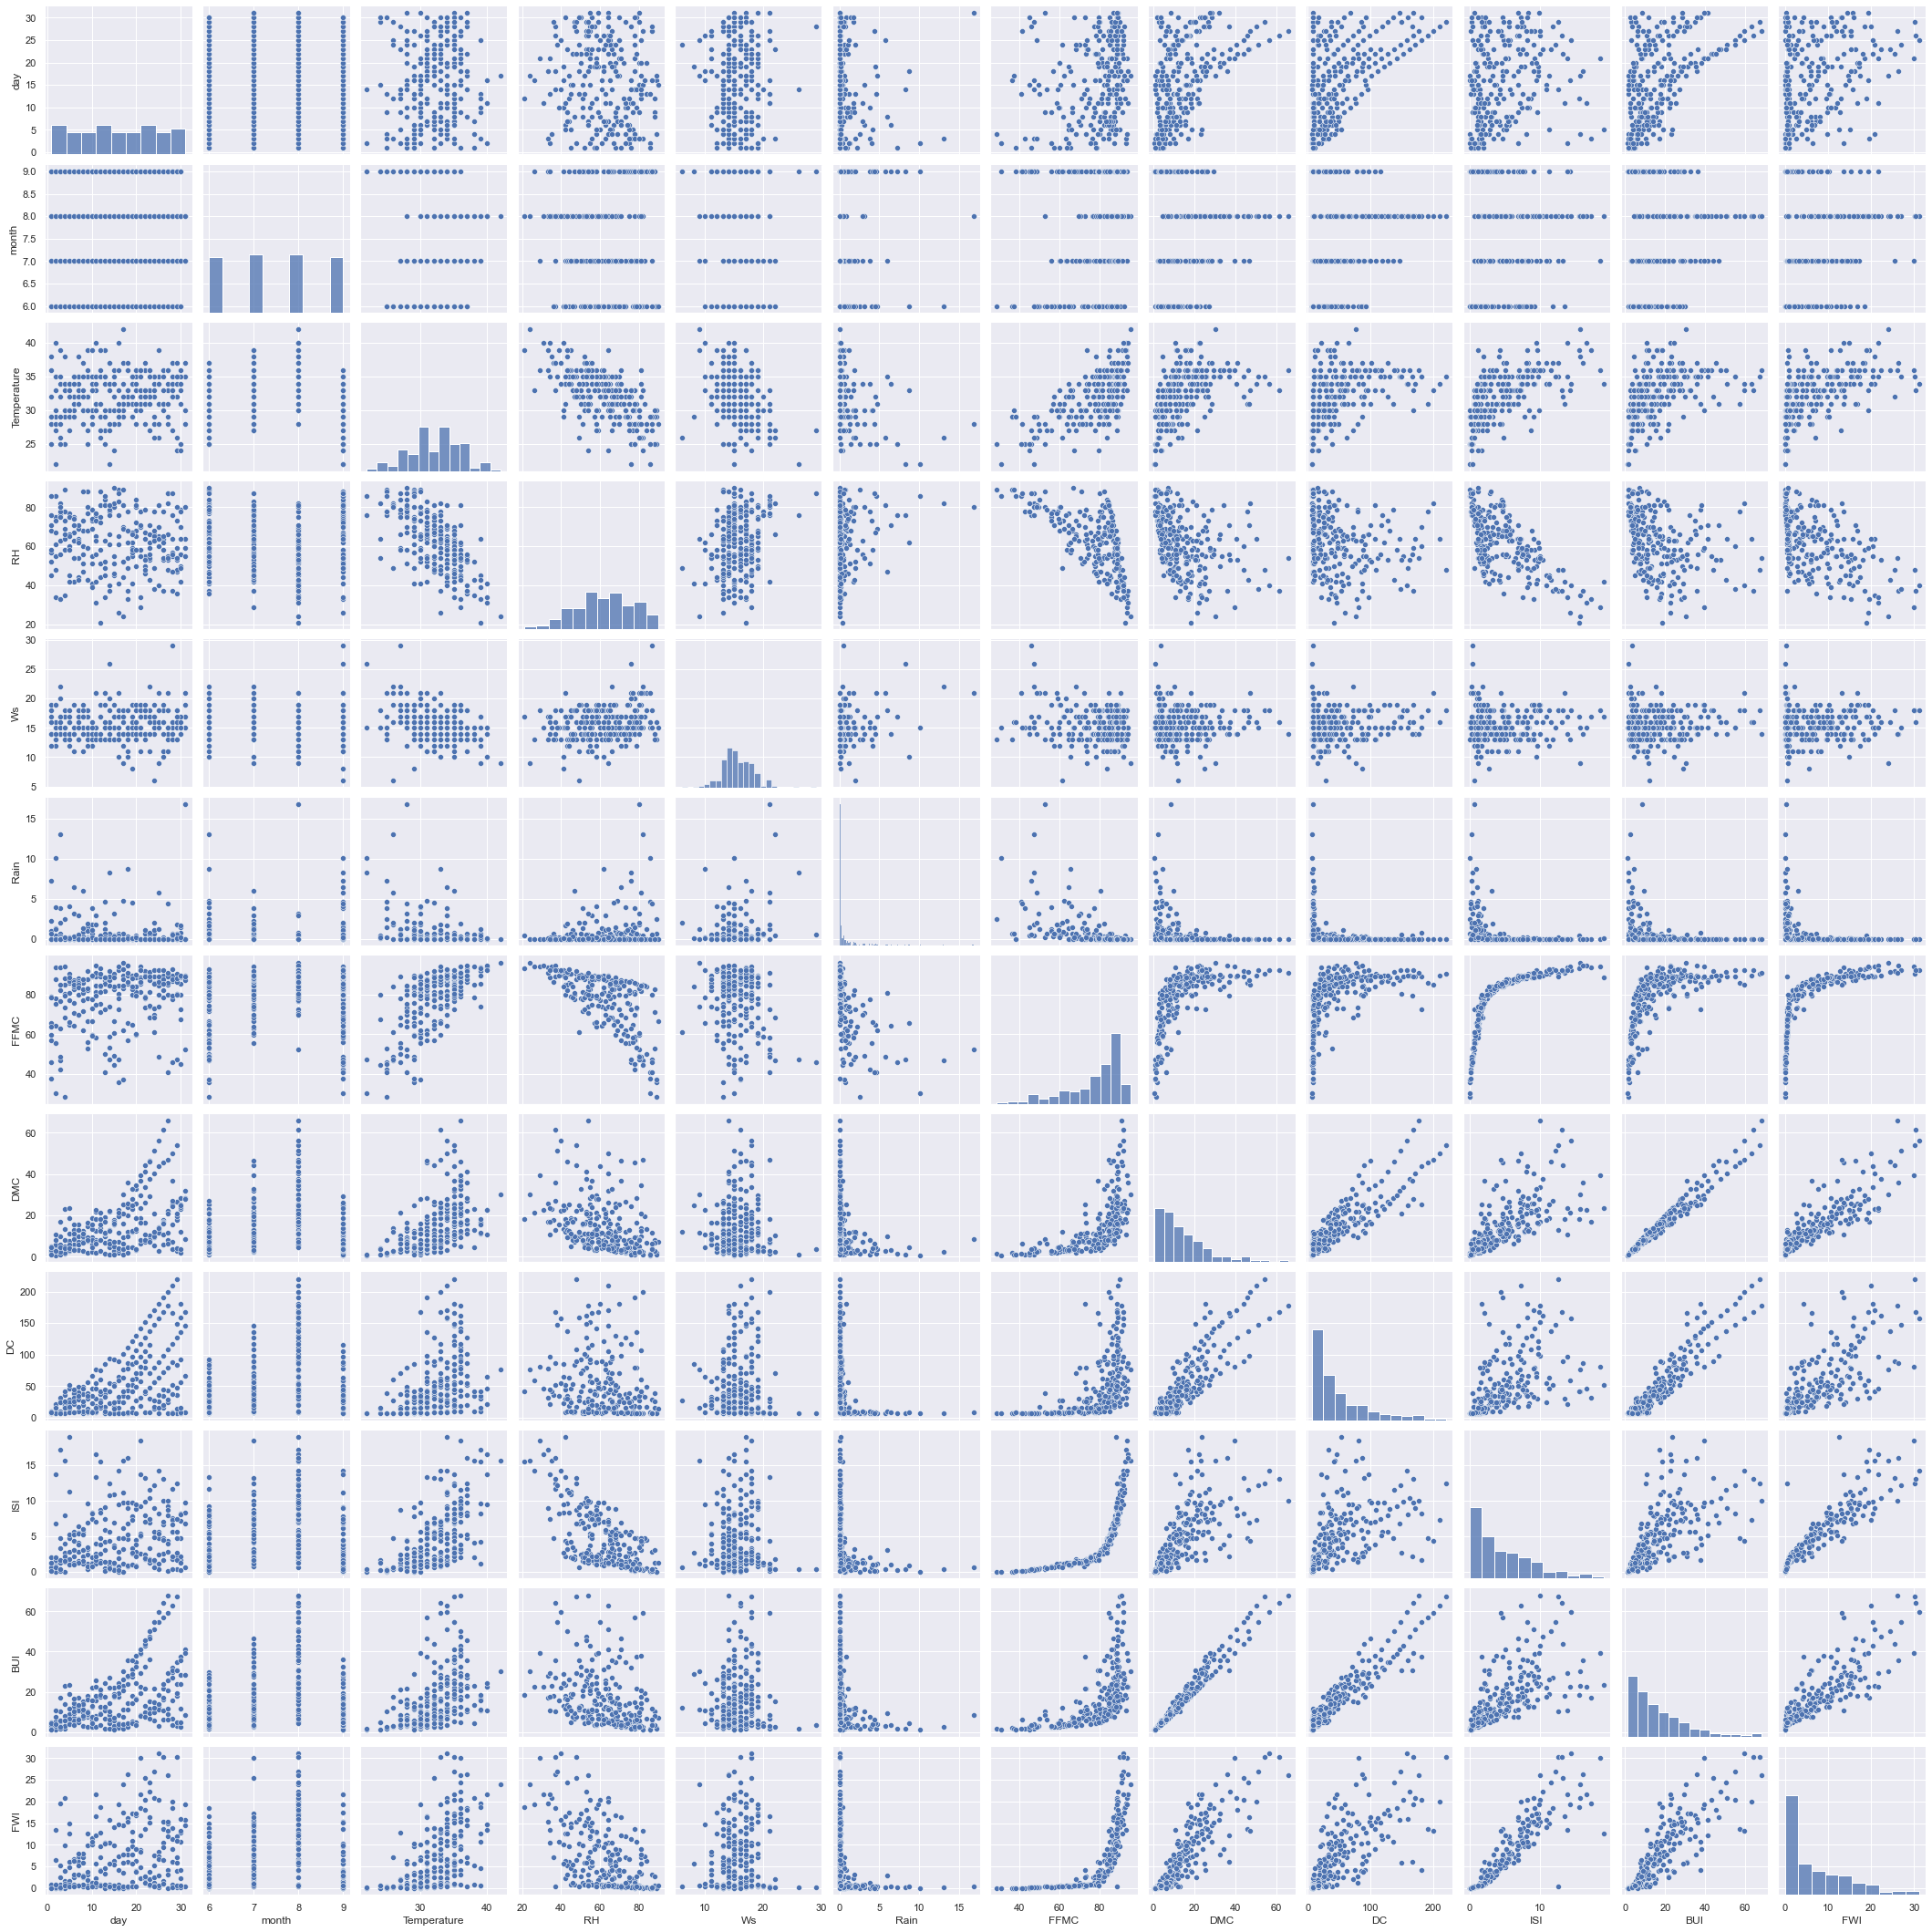

In [44]:
#plotting pairplot
sns.set(rc = {'figure.figsize' : (15,15)})
plt.suptitle('Multivariate Analysis of Numerical Features using pair plot', fontsize=20, fontweight='bold', alpha=0.8, y=1.)
sns.pairplot(df)

<AxesSubplot:>

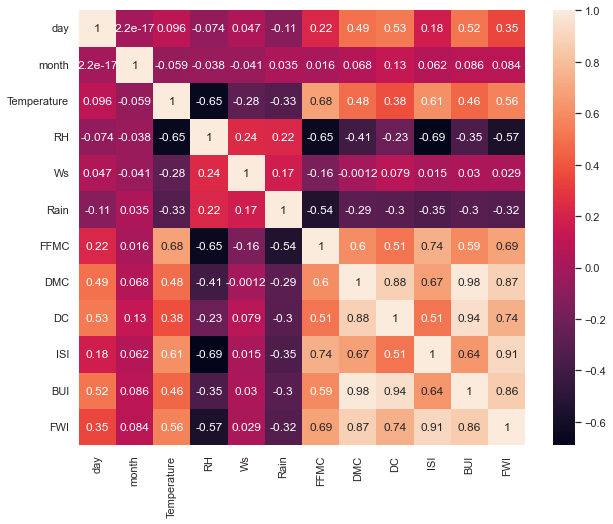

In [45]:

sns.set(rc = {'figure.figsize' : (10,8)})
sns.heatmap(df.corr(), annot = True)

# observation

There is no corelation among independent features


In [46]:
# Lets remove the outlier

def outlierremoval(df,column):
    IQR=df[column].quantile(0.75)-df[column].quantile(0.25)
    lowerfence=df[column].quantile(0.25)-(IQR*1.5)
    upperfence=df[column].quantile(0.75)+(IQR*1.5)
    print(f"the IOR details of the {column} is:")
    print(f"the Lower fence of  given column {column} is:{lowerfence}")
    print(f"the Upper fence of  given column {column} is:{upperfence}")
    df.loc[df[column]<=lowerfence,column]=lowerfence
    df.loc[df[column]>=upperfence,column]=upperfence
    

In [47]:
#lets change replace the value of region and classes with numerical value
df["Classes"]=pd.get_dummies(df["Classes"],drop_first=True)
df["Region"]=pd.get_dummies(df["Region"],drop_first=True)

In [48]:
df["Classes"].unique()

array([1, 0], dtype=uint8)

In [49]:
def outlierremoval(df,column):
    IQR=df[column].quantile(0.75)-df[column].quantile(0.25)
    lowerfence=df[column].quantile(0.25)-(IQR*1.5)
    upperfence=df[column].quantile(0.75)+(IQR*1.5)
    print(f"the IOR details of the {column} is:")
    print(f"the Lower fence of  given column {column} is:{lowerfence}")
    print(f"the Upper fence of  given column {column} is:{upperfence}")
    df.loc[df[column]<=lowerfence,column]=lowerfence
    df.loc[df[column]>=upperfence,column]=upperfence

In [50]:
for col in df.columns:
    outlierremoval(df,col)

the IOR details of the day is:
the Lower fence of  given column day is:-14.5
the Upper fence of  given column day is:45.5
the IOR details of the month is:
the Lower fence of  given column month is:5.5
the Upper fence of  given column month is:9.5
the IOR details of the Temperature is:
the Lower fence of  given column Temperature is:22.5
the Upper fence of  given column Temperature is:42.5
the IOR details of the RH is:
the Lower fence of  given column RH is:20.125
the Upper fence of  given column RH is:105.125
the IOR details of the Ws is:
the Lower fence of  given column Ws is:9.5
the Upper fence of  given column Ws is:21.5
the IOR details of the Rain is:
the Lower fence of  given column Rain is:-0.75
the Upper fence of  given column Rain is:1.25
the IOR details of the FFMC is:
the Lower fence of  given column FFMC is:47.73750000000001
the Upper fence of  given column FFMC is:112.63749999999999
the IOR details of the DMC is:
the Lower fence of  given column DMC is:-16.624999999999996
t

<AxesSubplot:>

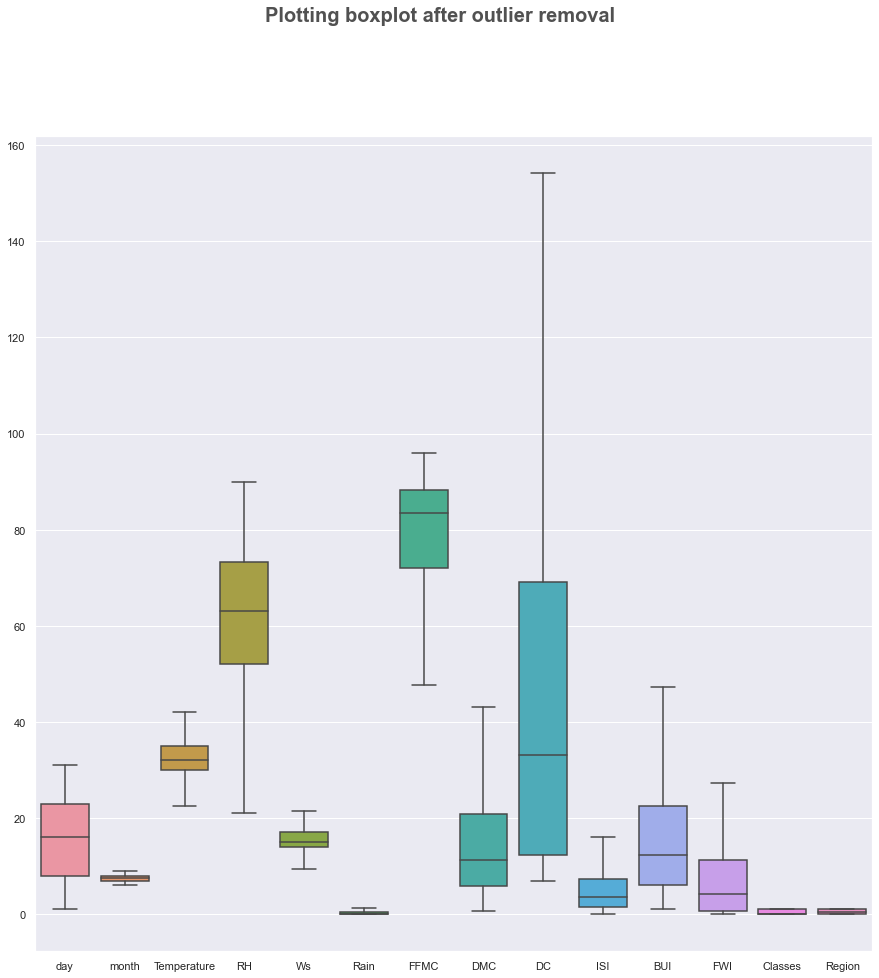

In [51]:
## plotting boxplot after removing the outlier
plt.figure(figsize=(15, 15))
plt.suptitle('Plotting boxplot after outlier removal', fontsize=20, fontweight='bold', alpha=0.8, y=1.)
sns.boxplot(data = df,orient="v")

In [52]:
df.isna().sum()

day            0
month          0
Temperature    0
RH             0
Ws             0
Rain           0
FFMC           0
DMC            0
DC             1
ISI            0
BUI            0
FWI            0
Classes        0
Region         0
dtype: int64

In [53]:
df["DC"].fillna(df["DC"].mode()[0],inplace=True)

In [54]:
#splitting between Dependent and Independent Variable

X=df.drop("Classes",axis=1)
y=df["Classes"]

In [55]:
X.head()

,day,month,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Region
0,1.0,6.0,29.0,57.0,18.0,0.00,65.7000,3.4,7.6,1.3,3.4,0.5,0.0
1,2.0,6.0,29.0,61.0,13.0,1.25,64.4000,4.1,7.6,1.0,3.9,0.4,0.0
2,3.0,6.0,26.0,82.0,21.5,1.25,47.7375,2.5,7.1,0.3,2.7,0.1,0.0
3,4.0,6.0,25.0,89.0,13.0,1.25,47.7375,1.3,6.9,0.0,1.7,0.0,0.0
4,5.0,6.0,27.0,77.0,16.0,0.00,64.8000,3.0,14.2,1.2,3.9,0.5,0.0


In [56]:
y.head()

0    1.0
1    1.0
2    1.0
3    1.0
4    1.0
Name: Classes, dtype: float64

In [57]:
#Generating test split

from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=42)

In [58]:
X_train.head()

,day,month,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Region
234,21.0,9.0,35.0,34.0,17.0,0.0,92.2,23.6,97.3,13.8,29.4,21.6,1.0
227,14.0,9.0,28.0,81.0,15.0,0.0,84.6,12.6,41.5,4.3,14.3,5.7,1.0
180,29.0,7.0,34.0,59.0,16.0,0.0,88.1,19.5,47.2,7.4,19.5,10.9,1.0
5,6.0,6.0,31.0,67.0,14.0,0.0,82.6,5.8,22.2,3.1,7.0,2.5,0.0
56,27.0,7.0,36.0,48.0,13.0,0.0,90.3,22.2,108.5,8.7,29.4,15.3,0.0


In [59]:
X_train.isna().sum()

day            0
month          0
Temperature    0
RH             0
Ws             0
Rain           0
FFMC           0
DMC            0
DC             0
ISI            0
BUI            0
FWI            0
Region         0
dtype: int64

In [60]:
X_train.shape

(170, 13)

In [61]:
X_test.head()

,day,month,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Region
24,25.0,6.0,31.0,64.0,15.0,0.0,86.7,14.2,63.8,5.7,18.3,8.4,0.0
6,7.0,6.0,33.0,54.0,13.0,0.0,88.2,9.9,30.5,6.4,10.9,7.2,0.0
153,2.0,7.0,33.0,48.0,16.0,0.0,87.6,7.9,17.8,6.8,7.8,6.4,1.0
211,29.0,8.0,35.0,53.0,17.0,0.5,80.2,20.7,149.2,2.7,30.6,5.9,1.0
198,16.0,8.0,40.0,41.0,10.0,0.1,92.0,22.6,65.1,9.5,24.2,14.8,1.0


In [62]:
X_test.isna().sum()

day            0
month          0
Temperature    0
RH             0
Ws             0
Rain           0
FFMC           0
DMC            0
DC             0
ISI            0
BUI            0
FWI            0
Region         0
dtype: int64

In [63]:
X_test.shape

(74, 13)

In [64]:
X_test.value_counts()

day   month  Temperature  RH    Ws    Rain  FFMC  DMC     DC     ISI   BUI      FWI   Region
1.0   7.0    28.0         58.0  18.0  1.25  63.7  3.200   8.5    1.2   3.3000   0.5   1.0       1
24.0  8.0    35.0         38.0  15.0  0.00  92.1  43.175  147.7  12.2  47.3125  26.9  1.0       1
22.0  9.0    31.0         50.0  19.0  0.60  77.8  10.600  41.4   2.4   12.9000  2.8   0.0       1
      8.0    36.0         55.0  18.0  0.00  89.1  33.500  151.3  9.9   43.1000  20.4  0.0       1
21.0  9.0    31.0         55.0  11.0  0.00  87.8  16.500  57.9   5.4   19.2000  8.3   0.0       1
                                                                                               ..
11.0  6.0    31.0         65.0  14.0  0.00  84.5  12.500  54.3   4.0   15.8000  5.6   0.0       1
10.0  9.0    33.0         73.0  12.0  1.25  59.9  2.200   8.9    0.7   2.7000   0.3   0.0       1
      8.0    39.0         39.0  15.0  0.20  89.3  15.800  35.4   8.2   15.8000  10.7  1.0       1
      6.0    28.0        

In [65]:
# Model building

In [66]:
from sklearn.linear_model import LogisticRegression

In [67]:
classifier=LogisticRegression(solver='lbfgs', max_iter=1000)
classifier

LogisticRegression(max_iter=1000)

In [68]:
classifier.fit(X_train,y_train)

LogisticRegression(max_iter=1000)

In [69]:
y_pred=classifier.predict(X_test)

In [70]:
from sklearn.metrics import accuracy_score,classification_report

# Accuracy Score

In [71]:
accuracy_score(y_pred,y_test)

0.9594594594594594

In [72]:
print(classification_report(y_pred,y_test))

              precision    recall  f1-score   support

         0.0       0.96      0.98      0.97        46
         1.0       0.96      0.93      0.95        28

    accuracy                           0.96        74
   macro avg       0.96      0.95      0.96        74
weighted avg       0.96      0.96      0.96        74



# observation

current accracy  is 95%

In [73]:
# Hypermater tuning
from sklearn.model_selection import GridSearchCV
import warnings
warnings.filterwarnings('ignore')
parameters = {
    'penalty' : ['l1','l2','elasticnet','none'], 
    'C'       : np.logspace(-3,3,7),
    'solver'  : ['lbfgs','newton-cg', 'liblinear','sag','saga'],
}

In [74]:
clf = GridSearchCV(classifier,                    # model
                   param_grid = parameters,   # hyperparameters
                   scoring='accuracy',        # metric for scoring
                   cv=10)                     # number of folds

In [75]:
clf.fit(X_train,y_train)

GridSearchCV(cv=10, estimator=LogisticRegression(max_iter=1000),
             param_grid={'C': array([1.e-03, 1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02, 1.e+03]),
                         'penalty': ['l1', 'l2', 'elasticnet', 'none'],
                         'solver': ['lbfgs', 'newton-cg', 'liblinear', 'sag',
                                    'saga']},
             scoring='accuracy')

In [76]:
print("Tuned Hyperparameters :", clf.best_params_)
print("Accuracy :",clf.best_score_)

Tuned Hyperparameters : {'C': 1000.0, 'penalty': 'l2', 'solver': 'newton-cg'}
Accuracy : 0.9705882352941178


#observation

1. We have successfully increased the accuracy from 95 percent to 97 percent using gridsearch cv
2. We get the best result with c 1000 and 12 regularization

In [77]:
y_pred= clf.predict(X_test) # confusion matrix with regards to GridSearchCv

In [78]:
print(classification_report(y_pred,y_test))

              precision    recall  f1-score   support

         0.0       0.98      0.98      0.98        47
         1.0       0.96      0.96      0.96        27

    accuracy                           0.97        74
   macro avg       0.97      0.97      0.97        74
weighted avg       0.97      0.97      0.97        74

